In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

### Подготовка данных

In [3]:
with np.load('mnist.npz', allow_pickle=True) as f: 
    train_x, train_y = f['x_train'], f['y_train']
    test_x, test_y = f['x_test'], f['y_test']
print(train_x.shape, train_y.shape)

(60000, 28, 28) (60000,)


label is 4


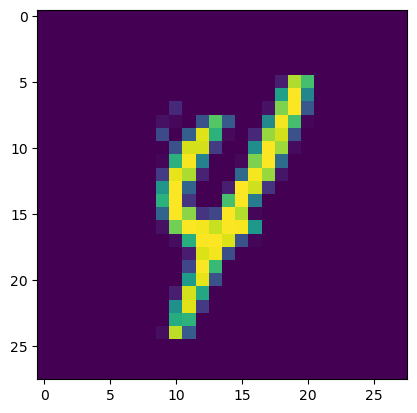

In [4]:
index = 3457
print('label is %d' % train_y[index])
plt.imshow(train_x[index])
plt.show()

In [5]:
train_x_1 = train_x.reshape(len(train_x), -1)
print(train_x_1.shape)

test_x_1 = test_x.reshape(len(test_x), -1)
print(test_x_1.shape)

(60000, 784)
(10000, 784)


### Мотивация: настройка параметров влияет на качество

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [9]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:2000], train_y[:2000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

1 0.86
3 0.9
5 0.9
7 0.89
9 0.9
[1, 2, 3, 4, 5, 6, 7, 8, 9]


Вывод: В зависимости от количества соседей в методе kNN качество может существенно отличаться!

### Задания

#### Задача 1

Подобрать оптимальные параметры для KNeighborsClassifier.
В качестве решения необходимо отправить код подбора параметров в этом ноутбуке seminar03_knn.ipynb и параметры лучшего классификатора knn_best_params.pkl

#### Задача 2

Найти 10 эталонов, чтобы качество классификации было максимальным. (Преодолеть 70%)

В качестве решения необходимо отправить код поиска эталонов в этом ноутбуке seminar03_knn.ipynb и файл с 10 эталонами knn_10_best.npy


#### Задача 3*

Сколько эталонов нужно, чтобы преодолеть 90% точность?
Задача не является обязательной, в качестве решения необходимо предоставить код с решением

#### Ноутбук с решением необходимо сдать отправить боту @ml2022sharebot c пометкой seminar03

### Решение задачи 1

In [10]:
n_neighbors_values = [1,3,5,7,9]
weights_values = ['uniform', 'distance']
p_values = [1, 2]
metric_values = ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
algorithm_values = ['auto', 'ball_tree', 'kd_tree', 'brute']

best_classifier = None

for n in n_neighbors_values:
    for w in weights_values:
        for p in p_values:
            for q in metric_values:
                for t in algorithm_values:
                    classifier = KNeighborsClassifier(n_neighbors=n, weights=w, p=p, metric=q, algorithm=t)
                    classifier.fit(train_x_1[:2000], train_y[:2000])
                    pred = classifier.predict(test_x_1[:100])
                    acc = accuracy_score(pred, test_y[:100])
                    if best_classifier is None or acc > best_classifier.best_accuracy:
                        best_classifier = classifier
                        best_classifier.best_accuracy = acc
                        best_classifier.best_params = {'n_neighbors': n, 'weights': w, 'p': p, 'metric':q, 'algorithm':t}

def get_params(self):
    return(best_classifier.best_params)

In [11]:
with open("knn_best_params.pkl", "wb") as f:
    pickle.dump(best_classifier.get_params(), f)

### Решение задачи 2

In [12]:
def create_etalons():
    for i in range(10):
        class_samples = train_x_1[train_y == i]
        etalon = np.mean(class_samples, axis=0)
        etalons_10[i] = etalon
    return etalons_10

In [13]:
etalons_10 = np.zeros((10, 784))
etalons_10 = create_etalons()
np.save('knn_10_best', etalons_10)

### Решение задачи 3

In [ ]:
# ваше решение задачи 3